In [1]:
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('../../data/03_primary/cells_reformated.csv')

In [3]:
markers = ['AP_mean', 'AP_stdev', 'first_AP_voltage', 'first_ISI', 'first_fall_tau',
           'peak_frequency', 'second_AP_voltage', 'second_ISI', 'second_fall_tau',
           'spikecount', 'stim_lenght', 'tau_mean', 'tau_stdev', 'vHold'
]
protocol_markers = ['apw', 'idr']
segmentation_markers = ['AP_mean', 'first_AP_voltage', 'first_ISI', 'first_fall_tau',
           'peak_frequency', 'tau_mean']
#integrate protocol in the filtering
# -> I element of distance is marker/protocol

In [4]:
cols_to_cluster = []
for marker in segmentation_markers:
    temp_list = [t for t in df.columns if (marker in t)]
    cols_to_cluster.extend(temp_list)
    

In [5]:
df_cluster = df[cols_to_cluster].copy()
df_scaled = df_cluster.copy()
df_scaled = df_scaled.fillna(df_scaled.mean())

scaler = StandardScaler().fit(df_scaled.values)
arr_scaled = scaler.transform(df_scaled.values)


In [6]:
df_scaled = pd.DataFrame(arr_scaled, columns=cols_to_cluster)

In [7]:
scaling_dict = {}

for col in cols_to_cluster:
    for p_marker in protocol_markers:
        if not (p_marker in scaling_dict.keys()):
            scaling_dict[p_marker]={}
        if p_marker in col:
            break
    for marker in segmentation_markers:
        if not (marker in scaling_dict[p_marker].keys()):
            scaling_dict[p_marker][marker]=[]
        if marker in col:
            break
    scaling_dict[p_marker][marker] += [col]

In [8]:
for key in scaling_dict.keys():
    for sub_key in scaling_dict[key].keys():
        feat_list = scaling_dict[key][sub_key]
        df_scaled[feat_list] = df_scaled[feat_list]/len(feat_list) 
    
    

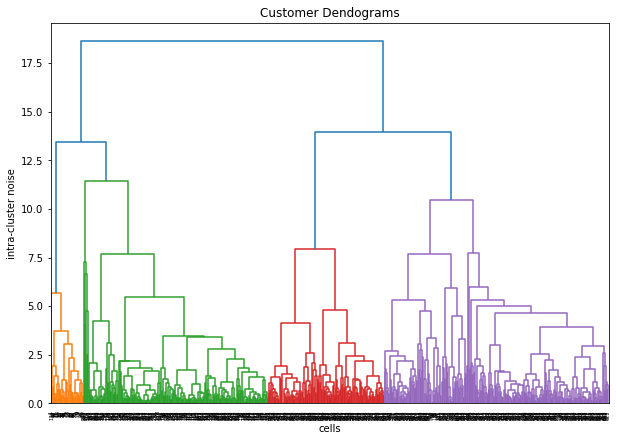

In [9]:
# plot full dendogram
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
plt.xlabel('cells')
plt.ylabel('intra-cluster noise')

z = shc.linkage(df_scaled, method='ward')
cutree = shc.cut_tree(z, n_clusters= 8)
dend = shc.dendrogram(z)
plt.show()

In [25]:
cutree_1 = pd.DataFrame(shc.cut_tree(z, n_clusters= 8), columns = ['8_clusters'])
cutree_2 = pd.DataFrame(shc.cut_tree(z, n_clusters= 9), columns = ['9_clusters'])
cutree_3 = pd.DataFrame(shc.cut_tree(z, n_clusters= 10), columns = ['10_clusters'])


In [26]:
pd.concat([cutree_1, cutree_2, cutree_3], axis=1)
#              , columns = [f'cuttree_{t}' for t in range[3]])

,8_clusters,9_clusters,10_clusters
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
644,3,3,3
645,5,5,6
646,2,2,2
647,5,5,6


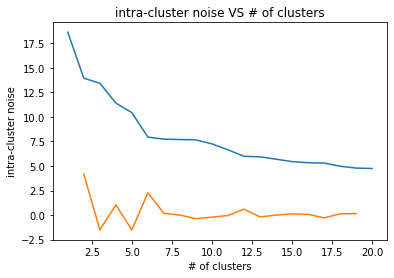

In [27]:
last = z[-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.title("intra-cluster noise VS # of clusters")
plt.xlabel('# of clusters')
plt.ylabel('intra-cluster noise')
plt.show()

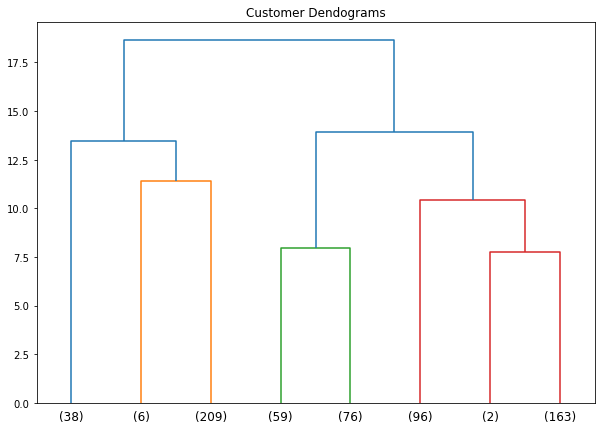

In [12]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
# z = shc.linkage(df_final, method='ward')
# cutree = shc.cut_tree(z, n_clusters= 8)
dend = shc.dendrogram(z, truncate_mode='lastp', p = 8)

In [13]:
df_cluster_ = pd.concat([df_cluster, pd.DataFrame(cutree)], axis=1)
# df_cluster.columns = df.columns.tolist()+['cluster']


In [20]:
df_cluster_ = pd.concat([df_cluster, pd.DataFrame(cutree)], axis=1)
df_cluster_.columns = df_cluster.columns.tolist()+['cluster']

scaler = StandardScaler()
df_cluster_norm = scaler.fit_transform(df_cluster_)
df_cluster_norm = pd.DataFrame(df_cluster_norm, columns = df_cluster_.columns )

In [ ]:
centroids = df_cluster_.groupby('cluster').mean()
# centroids = pd.concat([centroids, key], axis =1)

In [ ]:
centroids_norm = df_cluster_norm.groupby('cluster').mean()
# centroids_norm = pd.concat([centroids_norm, key], axis =1)

In [ ]:
centroids_norm.to_csv('full_normalized_centroids.csv')
centroids.to_csv('centroids_non_norm.csv')
df_cluster.to_csv('clustered_data.csv')